In [1]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
crime_csv = pd.read_csv("crime_data_clean.csv")
crime_df = pd.DataFrame(crime_csv)

home_ownership_csv = pd.read_csv("Homeownership_ACS.clean")
home_ownership_df = pd.DataFrame(home_ownership_csv)

In [3]:
home_ownership_df = home_ownership_df[["County", "HOR"]]
crime_df = crime_df[["county","crime_rate_per_100000"]]
crime_df = crime_df.rename(columns={"crime_rate_per_100000": "crime_rate_per_100,000"})
home_ownership_df  = home_ownership_df.rename(columns={"County": "county"})

In [4]:
crime_df.head()

,county,"crime_rate_per_100,000"
0,"St. Louis, MO",1791.995377
1,"Crittenden, AR",1754.914968
2,"Alexander, IL",1664.700485
3,"Kenedy, TX",1456.310680
4,"De Soto, LA",1447.402430


In [7]:
home_ownership_df.head(179)

,county,HOR
0,"Autauga, AL",73.3
1,"Baldwin, AL",72.9
2,"Barbour, AL",62.5
3,"Bibb, AL",75.4
4,"Blount, AL",78.5
5,"Bullock, AL",70.0
6,"Butler, AL",70.1
7,"Calhoun, AL",69.4
8,"Chambers, AL",66.5
9,"Cherokee, AL",78.1


In [114]:
sample_home_ownership = home_ownership_df.sample(n=650)
sample_home_ownership = sample_home_ownership.reset_index(drop=True)
sample_home_ownership.head()

,county,HOR
0,"Hutchinson, TX",79.5
1,"Brown, WI",65.1
2,"Lyman, SD",69.9
3,"Williamsburg city, VA",47.3
4,"Dodge, WI",70.4


In [115]:
crime_analysis = sample_home_ownership.merge(crime_df, on="county")
crime_analysis.head()

,county,HOR,"crime_rate_per_100,000"
0,"Hutchinson, TX",79.5,646.225766
1,"Brown, WI",65.1,278.098560
2,"Lyman, SD",69.9,0.000000
3,"Dodge, WI",70.4,76.971837
4,"Worth, MO",75.6,95.693780


In [116]:
len(crime_analysis)

616

## Analysis

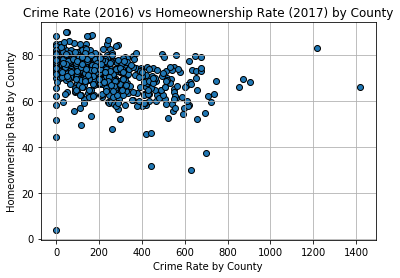

In [118]:
plt.scatter(crime_analysis["crime_rate_per_100,000"], crime_analysis["HOR"], marker="o", edgecolor='black')
plt.title("Crime Rate (2016) vs Homeownership Rate (2017) by County")
plt.ylabel("Homeownership Rate by County")
plt.xlabel("Crime Rate by County")
plt.grid(True)
plt.savefig('Pictures/Crime_rate_scatter.png')

In [119]:
x = crime_analysis["crime_rate_per_100,000"]
y = crime_analysis["HOR"]
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    HOR   R-squared (uncentered):                   0.559
Model:                            OLS   Adj. R-squared (uncentered):              0.558
Method:                 Least Squares   F-statistic:                              779.7
Date:                Sat, 07 Sep 2019   Prob (F-statistic):                   1.92e-111
Time:                        14:01:52   Log-Likelihood:                         -3257.4
No. Observations:                 616   AIC:                                      6517.
Df Residuals:                     615   BIC:                                      6521.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
crime_rate_per_100,000     0.1839      0.007     27.923      0.000       0.171       0.197
==============================================================================
Omnibus:                      154.479   Durbin-Watson:                   1.196
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              364.530
Skew:                          -1.304   Prob(JB):                     6.97e-80
Kurtosis:                       5.720   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
# Set line
(slope, intercept, _, _, _) = linregress(x, y)
fit = slope * x + intercept

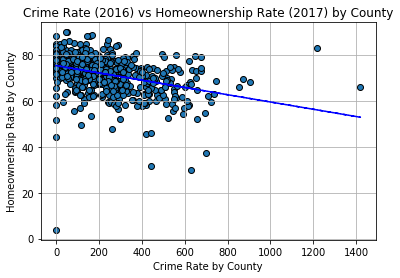

In [127]:
plt.scatter(crime_analysis["crime_rate_per_100,000"], crime_analysis["HOR"], marker="o", edgecolor='black')
plt.title("Crime Rate (2016) vs Homeownership Rate (2017) by County")
plt.ylabel("Homeownership Rate by County")
plt.xlabel("Crime Rate by County")
plt.grid(True)
plt.plot(x, fit, 'b--')
plt.savefig('Pictures/Crime_rate_regression.png')